In [42]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Data Exploration

In [4]:
df = pd.read_csv("ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
# Dropping the timestamp column, which won't be used.
df = df.drop("timestamp", axis=1)
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


### Average Rating per Movie

In [25]:
t = df.groupby("movieId")
t.mean()["rating"]

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

<BarContainer object of 9724 artists>

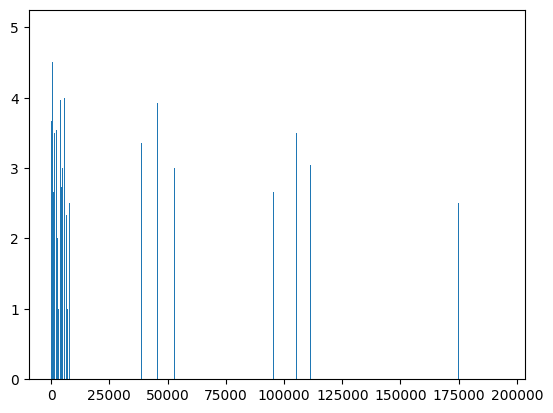

In [27]:
plt.bar(df["movieId"].unique(), t.mean()["rating"])

## Baseline Model: Linear Regression with User and Movie IDs Only

In [51]:
lr = LinearRegression()
X = df.drop("rating", axis=1)
y = df[["rating"]]
lr.fit(X, y)
print(lr.score(X, y))

0.002449112623689631


In [ ]:
# df.explode("col")